In [1]:
# 한글 폰트 설치하기 (꼭! 설치가 완료되면 [런타임 다시 시작]을 누르고 다시 실행하기)
!apt install fonts-nanum -y

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정하기
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
matplotlib.font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [2]:
#import necessary librabry
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
!unzip /content/drive/MyDrive/cardectiondata.zip

Archive:  /content/drive/MyDrive/cardectiondata.zip
replace data1a/training/00-damage/0001.JPEG? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [4]:
#defining the base, train and validation directory path
base_dir = '/content/data1a'
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')

In [5]:
#defining the damage and whole , train nand validation directory
train_damage_dir = os.path.join(train_dir, '00-damage')
train_whole_dir = os.path.join(train_dir, '01-whole')
validation_damage_dir = os.path.join(validation_dir, '00-damage')
validation_whole_dir = os.path.join(validation_dir, '01-whole')

In [6]:
#data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150), 
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [8]:
#Basic model
from tensorflow.keras import Model 
from tensorflow.keras.applications import DenseNet121   

base_model = DenseNet121(input_shape = (150, 150, 3),  include_top = False, weights = 'imagenet') 

x=   tf.keras.layers.Flatten()(base_model.output)
x=   tf.keras.layers.Dense(512, activation='relu')(x) 
x=   tf.keras.layers.Dense(1, activation='sigmoid')(x) 

model= Model( base_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['Accuracy','Precision','Recall'])

#training the model
history = model.fit(
      train_generator,
      epochs=15,
      validation_data=validation_generator,
      verbose=2)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


92/92 - 44s - loss: 0.5382 - Accuracy: 0.8413 - precision: 0.8458 - recall: 0.8348 - val_loss: 1.4284 - val_Accuracy: 0.7326 - val_precision: 0.6533 - val_recall: 0.9913 - 44s/epoch - 476ms/step
Epoch 2/15
92/92 - 18s - loss: 0.1264 - Accuracy: 0.9565 - precision: 0.9667 - recall: 0.9457 - val_loss: 0.3014 - val_Accuracy: 0.9391 - val_precision: 0.9469 - val_recall: 0.9304 - 18s/epoch - 193ms/step
Epoch 3/15
92/92 - 16s - loss: 0.0938 - Accuracy: 0.9701 - precision: 0.9727 - recall: 0.9674 - val_loss: 0.5818 - val_Accuracy: 0.9130 - val_precision: 0.8711 - val_recall: 0.9696 - 16s/epoch - 178ms/step
Epoch 4/15
92/92 - 16s - loss: 0.0417 - Accuracy: 0.9853 - precision: 0.9848 - recall: 0.9859 - val_loss: 0.5705 - val_Accuracy: 0.9152 - val_precision: 0.8866 - val_recall: 0.9522 - 16s/epoch - 177ms/step
Epoch 5/15
92/92 - 16s - loss: 0.0484 - Accuracy: 0.9859 - precision: 0.9880 - recall: 0.9837 - val_loss: 0.5303 - val_Accuracy: 0.9239 - val_precision: 0.8884 - val_recall: 0.9696 - 16s/

In [9]:
#weights saving
model.save("classifier.h5")

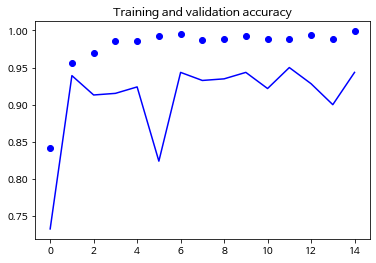

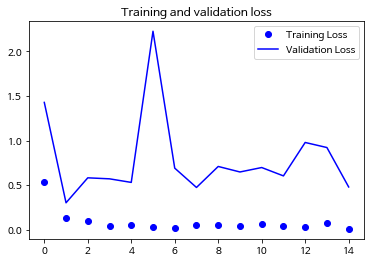

In [10]:
import matplotlib.pyplot as plt
acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

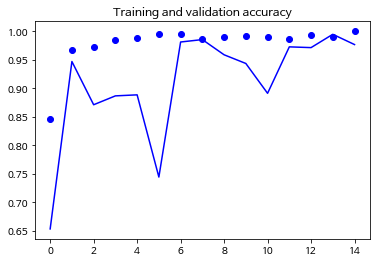

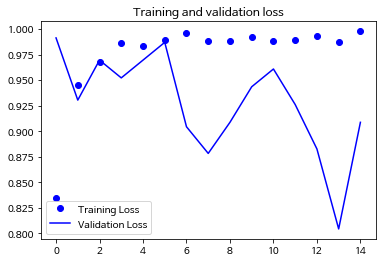

In [11]:
import matplotlib.pyplot as plt
acc = history.history['precision']
val_acc = history.history['val_precision']
loss = history.history['recall']
val_loss = history.history['val_recall']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The car is damaged


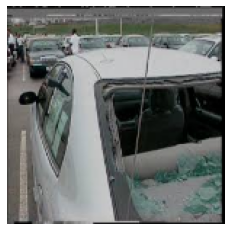

In [12]:
import cv2
im = cv2.imread("/content/data1a/validation/00-damage/0021.JPEG")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (150, 150)) 
imS=im.reshape([1,150,150,3])
pred=model.predict(np.array(imS))
if pred[0][0] > 0.5:
    print("The car is damaged")
else:
    print("The car is not damaged")
plt.axis("off")
plt.imshow(im)

[[0.]]
The car is not damaged


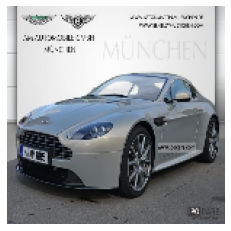

In [13]:
im = cv2.imread("/content/data1a/validation/01-whole/0013.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (150, 150)) 
imS=im.reshape([1,150,150,3])
pred=model.predict(np.array(imS))
print(pred)
if pred[0][0] > 0:
    print("The car is damaged")
else:
    print("The car is not damaged")
plt.axis("off")
plt.imshow(im)

# 모델: LeNet-**5**

In [14]:
%load_ext tensorboard

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, Dropout

In [20]:
# LeNet-5 클래스 생성
class LeNet(Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()

        self.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), activation='relu',
                        input_shape=input_shape, padding="same"))
        self.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
        self.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='relu', padding='valid'))
        self.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
        self.add(Flatten())
        self.add(Dense(120, activation='relu'))
        self.add(Dense(84, activation='relu'))
        self.add(Dense(nb_classes, activation='softmax'))

        self.compile(optimizer='adam',
                     loss=categorical_crossentropy,
                     metrics=['accuracy'])

num_classes = 2

model2 = LeNet((150,150,3), num_classes)
model2.summary()


Model: "le_net_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 6)       456       
                                                                 
 average_pooling2d_2 (Averag  (None, 75, 75, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 71, 71, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 35, 35, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 19600)             0         
                                                                 
 dense_5 (Dense)             (None, 120)               235

In [21]:
# 파라미터 초기화 및 데이터 호출

EPOCHS = 100
BATCH_SIZE = 32
image_height = 150
image_width = 150
train_dir = os.path.join(base_dir, 'training')
valid_dir = os.path.join(base_dir, 'validation')



In [22]:
# 이미지 데이터 증가
train = ImageDataGenerator(
          rescale=1./255,
          rotation_range=10,
          width_shift_range=0.1,
          height_shift_range=0.1,
          shear_range=0.1,
          zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir, 
                                            target_size=(image_height, image_width),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            seed=1,
                                            shuffle=True,
                                            class_mode="categorical")
valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir, 
                                            target_size=(image_height, image_width),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            seed=7,
                                            shuffle=True,
                                            class_mode="categorical")

train_num = train_generator.samples
valid_num = valid_generator.samples

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [24]:
# 텐서보드에 모델 훈련 과정 살펴보기

model2.fit(train_generator,
          epochs=EPOCHS,
          validation_data=valid_generator,
          validation_steps=valid_num // BATCH_SIZE,
          verbose=1)

Epoch 1/100
58/58 [==============================] - 18s 287ms/step - loss: 0.7234 - accuracy: 0.5033 - val_loss: 0.6865 - val_accuracy: 0.6362
Epoch 2/100
58/58 [==============================] - 17s 301ms/step - loss: 0.6554 - accuracy: 0.6326 - val_loss: 0.6056 - val_accuracy: 0.6786
Epoch 3/100
58/58 [==============================] - 17s 292ms/step - loss: 0.6065 - accuracy: 0.6875 - val_loss: 0.6074 - val_accuracy: 0.6629
Epoch 4/100
58/58 [==============================] - 18s 306ms/step - loss: 0.5756 - accuracy: 0.7082 - val_loss: 0.5372 - val_accuracy: 0.7411
Epoch 5/100
58/58 [==============================] - 17s 298ms/step - loss: 0.5658 - accuracy: 0.7185 - val_loss: 0.5045 - val_accuracy: 0.7388
Epoch 6/100
58/58 [==============================] - 16s 283ms/step - loss: 0.5284 - accuracy: 0.7424 - val_loss: 0.5241 - val_accuracy: 0.7411
Epoch 7/100
58/58 [==============================] - 17s 284ms/step - loss: 0.5522 - accuracy: 0.7234 - val_loss: 0.5113 - val_accuracy:

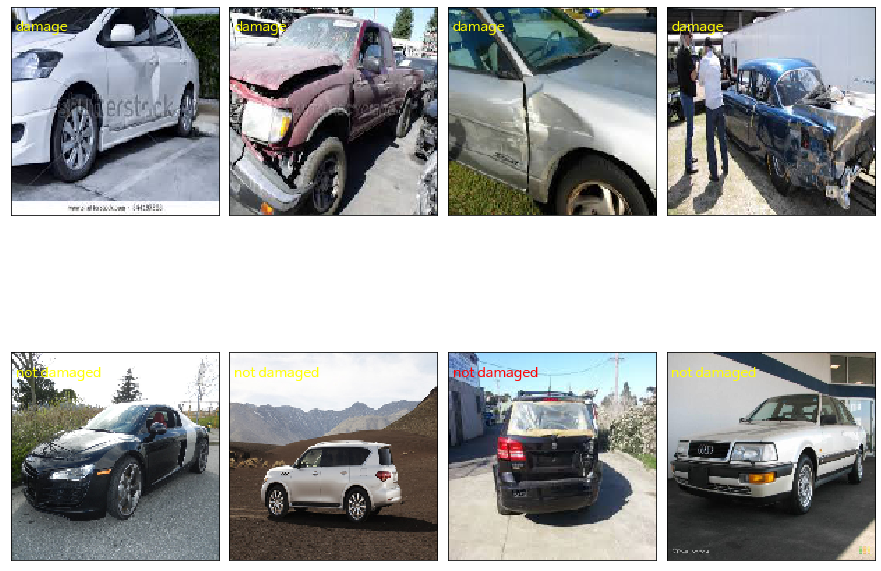

In [25]:

# 이미지 데이터셋 분류에 대한 예측

class_names = ['damage', 'not damaged']
validation, label_batch = next(iter(valid_generator))
prediction_values = model2.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.5, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2,4, i+1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

In [26]:
#weights saving
model2.save("classifier2.h5")

The car is damaged


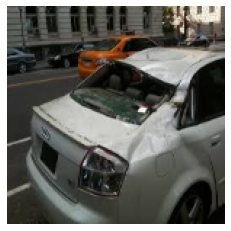

In [31]:
import cv2
im = cv2.imread("/content/data1a/validation/00-damage/0005.JPEG")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (150, 150)) 
imS=im.reshape([1,150,150,3])
pred=model2.predict(np.array(imS))
if pred[0][0] > 0.5:
    print("The car is damaged")
else:
    print("The car is not damaged")
plt.axis("off")
plt.imshow(im)

[[0. 1.]]
The car is not damaged


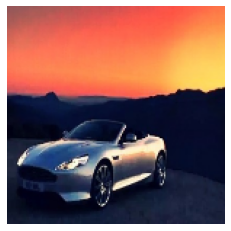

In [32]:
im = cv2.imread("/content/data1a/validation/01-whole/0014.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (150, 150)) 
imS=im.reshape([1,150,150,3])
pred=model2.predict(np.array(imS))
print(pred)
if pred[0][0] > 0.5:
    print("The car is damaged")
else:
    print("The car is not damaged")
plt.axis("off")
plt.imshow(im)

# 모델 : **AlexNet**

In [39]:
class AlexNet(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(Conv2D(96, kernel_size=(11,11), strides=4, activation='relu',
                        input_shape=input_shape, padding="valid",
                        kernel_initializer='he_normal'))
        self.add(AveragePooling2D(pool_size=(3,3), strides=(2,2), padding='valid', data_format='channels_last'))

        self.add(Conv2D(256, kernel_size=(5,5), strides=1, activation='relu', padding='same',
                        kernel_initializer='he_normal'))
        
        self.add(AveragePooling2D(pool_size=(3,3), strides=(2,2), padding='valid',
                                  data_format='channels_last'))
        
        self.add(Conv2D(384, kernel_size=(3,3), strides=1,
                        padding='same', activation='relu',
                        kernel_initializer='he_normal'))
        self.add(Conv2D(384, kernel_size=(3,3), strides=1,
                        padding='same', activation='relu',
                        kernel_initializer='he_normal'))
        self.add(Conv2D(256, kernel_size=(3,3), strides=1,
                        padding='same', activation='relu',
                        kernel_initializer='he_normal'))
        self.add(AveragePooling2D(pool_size=(3,3), strides=(2,2), padding='valid',
                                  data_format='channels_last'))

        
        self.add(Flatten())
        self.add(Dense(4096, activation='relu'))
        self.add(Dense(4096, activation='relu'))
        self.add(Dense(1000, activation='relu'))
        self.add(Dense(num_classes, activation='softmax'))

        self.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                     loss=categorical_crossentropy,
                     metrics=['accuracy'])

In [40]:
num_classes = 2 # 파손상태에 대한 분류

model3 = AlexNet((150,150,3), num_classes)
model3.summary()

Model: "alex_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 35, 35, 96)        34944     
                                                                 
 average_pooling2d_4 (Averag  (None, 17, 17, 96)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 17, 17, 256)       614656    
                                                                 
 average_pooling2d_5 (Averag  (None, 8, 8, 256)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 384)         885120    
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 384)         132

In [41]:
# 파라미터 초기화 및 데이터 호출

EPOCHS = 40
BATCH_SIZE = 32
image_height = 150
image_width = 150
train_dir = os.path.join(base_dir, 'training')
valid_dir = os.path.join(base_dir, 'validation')


In [42]:
# 텐서보드에 모델 훈련 과정 살펴보기

model3.fit(train_generator,
          epochs=EPOCHS,
          validation_data=valid_generator,
          validation_steps=valid_num // BATCH_SIZE,
          verbose=1)

Epoch 1/40
58/58 [==============================] - 20s 322ms/step - loss: 1.7544 - accuracy: 0.4913 - val_loss: 0.6919 - val_accuracy: 0.5446
Epoch 2/40
58/58 [==============================] - 17s 287ms/step - loss: 0.6937 - accuracy: 0.4918 - val_loss: 0.6931 - val_accuracy: 0.5045
Epoch 3/40
58/58 [==============================] - 17s 285ms/step - loss: 0.6933 - accuracy: 0.4815 - val_loss: 0.6931 - val_accuracy: 0.5022
Epoch 4/40
58/58 [==============================] - 17s 287ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5045
Epoch 5/40
58/58 [==============================] - 16s 282ms/step - loss: 0.6933 - accuracy: 0.4707 - val_loss: 0.6932 - val_accuracy: 0.4978
Epoch 6/40
58/58 [==============================] - 17s 286ms/step - loss: 0.6932 - accuracy: 0.4886 - val_loss: 0.6933 - val_accuracy: 0.4978
Epoch 7/40
58/58 [==============================] - 17s 285ms/step - loss: 0.6991 - accuracy: 0.4897 - val_loss: 0.6932 - val_accuracy: 0.4978

In [44]:
#weights saving
model3.save("classifier3.h5")

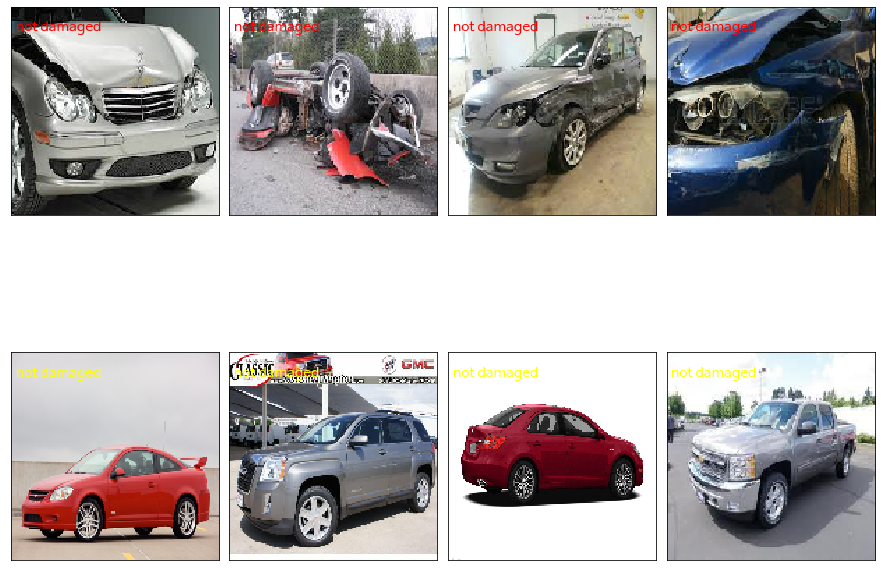

In [45]:

# 이미지 데이터셋 분류에 대한 예측

class_names = ['damage', 'not damaged']
validation, label_batch = next(iter(valid_generator))
prediction_values = model3.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.5, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2,4, i+1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

The car is not damaged


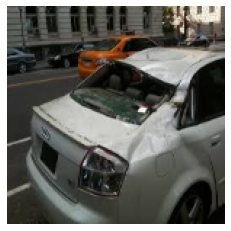

In [46]:
import cv2
im = cv2.imread("/content/data1a/validation/00-damage/0005.JPEG")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (150, 150)) 
imS=im.reshape([1,150,150,3])
pred=model3.predict(np.array(imS))
if pred[0][0] > 0.5:
    print("The car is damaged")
else:
    print("The car is not damaged")
plt.axis("off")
plt.imshow(im)

# 모델 : **VGG19**

In [50]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [53]:
from tensorflow.python import metrics
from tensorflow.python.ops import losses
class VGG19(Sequential):
    def __init__(self, input_shape):
        super().__init__()

        self.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape))
        self.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        self.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

        self.add(Flatten())
        self.add(Dense(4096, activation ='relu'))
        self.add(Dropout(0.5))
        self.add(Dense(4096, activation='relu'))
        self.add(Dropout(0.5))
        self.add(Dense(2, activation='softmax'))

        self.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [54]:
model4 = VGG19(input_shape=(150,150,3))
model4.summary()

Model: "vgg19_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 128)       73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                       

In [55]:
# 텐서보드에 모델 훈련 과정 살펴보기

history2 = model4.fit(train_generator,
          epochs=EPOCHS,
          validation_data=valid_generator,
          validation_steps=valid_num // BATCH_SIZE,
          verbose=1)

Epoch 1/40
58/58 [==============================] - 28s 423ms/step - loss: 13.0608 - accuracy: 0.4967 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/40
58/58 [==============================] - 23s 391ms/step - loss: 0.6938 - accuracy: 0.5005 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 3/40
58/58 [==============================] - 22s 377ms/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 4/40
58/58 [==============================] - 22s 376ms/step - loss: 0.6941 - accuracy: 0.4799 - val_loss: 0.6934 - val_accuracy: 0.4933
Epoch 5/40
58/58 [==============================] - 22s 375ms/step - loss: 0.6940 - accuracy: 0.4826 - val_loss: 0.6931 - val_accuracy: 0.5022
Epoch 6/40
58/58 [==============================] - 22s 373ms/step - loss: 0.6936 - accuracy: 0.4902 - val_loss: 0.6932 - val_accuracy: 0.5022
Epoch 7/40
58/58 [==============================] - 22s 371ms/step - loss: 0.6936 - accuracy: 0.4897 - val_loss: 0.6931 - val_accuracy: 0.504

In [59]:
#weights saving
model4.save("classifier4.h5")

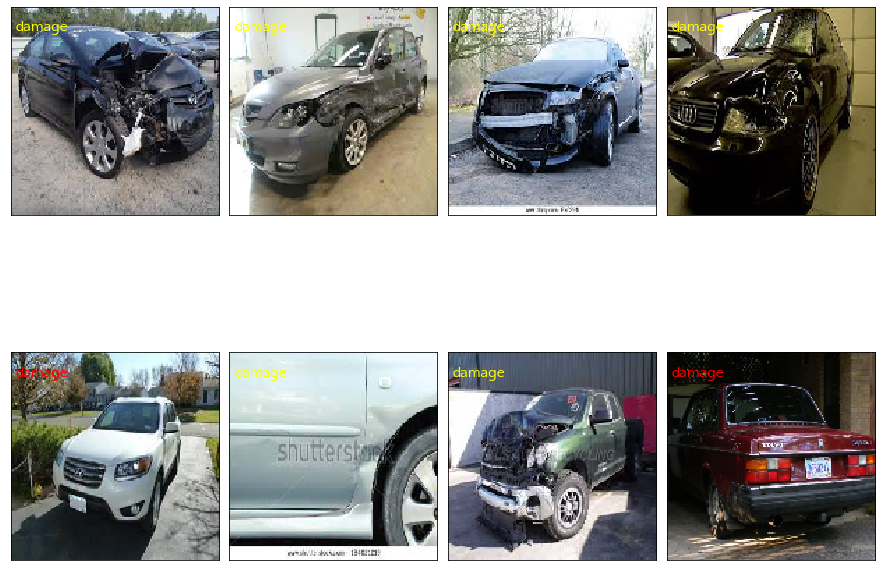

In [60]:

# 이미지 데이터셋 분류에 대한 예측

class_names = ['damage', 'not damaged']
validation, label_batch = next(iter(valid_generator))
prediction_values = model4.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.5, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2,4, i+1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)